In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils, to_categorical
import csv

Using TensorFlow backend.


In [6]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [8]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [9]:
fixtures
# #make full time results one hot encoding
# lb = LabelBinarizer()
# fixtures[14] = lb.fit_transform(fixtures[[14]]).tolist()

# #make full time home team final goals one hot encoding
# # lb = LabelBinarizer()
# # fixtures[8] = lb.fit_transform(fixtures[[8]]).tolist()
# # fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [104]:
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest = X.ix[600:,]
Ytest = Y.ix[600:,]
Xtrain




# Xtrain = dataset.values[:600,0:8]
# Ytrain = dataset.values[:600,8:9]
# Xtrain

# Xtest = dataset.values[600:,0:8]
# Ytest = dataset.values[600:,8:9] # currently predicting full time home goals


# #scaling the data 
# # X_scaled = preprocessing.scale(Xtrain)
# # Y_scaled = preprocessing.scale(Ytrain)

# #one hot encoding the output values
# encoder = LabelEncoder()
# encoder.fit(Ytrain)
# encoded_Y = encoder.transform(Ytrain)
# dummy_y = np_utils.to_categorical(encoded_Y)
# Xtrain

/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


array([[ 0.32991807, -1.00166528,  0.32422988, ..., -0.21617906,
        -0.04039387, -0.37653795],
       [ 0.32991807, -1.00166528,  1.49809831, ...,  2.11368795,
         0.49329439, -0.79507277],
       [ 0.32991807, -1.00166528, -0.84963855, ..., -0.22754426,
        -0.11663505, -0.40389317],
       ...,
       [-0.93140991,  0.99833749,  1.49809831, ..., -0.80716971,
         0.72201792,  1.51097198],
       [-0.93140991,  0.99833749,  0.32422988, ..., -0.86967834,
         1.48442972,  2.33162847],
       [-0.93140991, -1.00166528,  0.32422988, ..., -0.44348315,
        -0.19287623, -0.13034101]])

In [105]:
# def regression_model():
# 	model = Sequential()
# 	model.add(Dense(15, input_shape=(8,), kernel_initializer='normal', activation='relu'))
# 	#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(7, kernel_initializer='normal'))
# 	model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# 	return model

In [106]:
# estimator = KerasClassifier(build_fn=regression_model, nb_epoch=100, batch_size=300)#, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, Xtrain, Ytrain, cv=kfold)
# results
# print("Results: %.2f MSE" % (results.mean()))


In [107]:
# #second model
# model = Sequential()
# model.add(Dense(500, input_shape=(8,), kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(100, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# # train model
# history = model.fit(X_scaled, Y_scaled, epochs=100, batch_size=30, verbose=2, validation_split = 0.3)


In [124]:
model = Sequential()
model.add(Dense(25, input_dim=8, activation='relu'))
model.add(Dense(105, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [125]:
history = model.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/1000
 - 1s - loss: 1.9858 - acc: 0.1714 - val_loss: 1.9769 - val_acc: 0.1934
Epoch 2/1000
 - 0s - loss: 1.9806 - acc: 0.1881 - val_loss: 1.9719 - val_acc: 0.2099
Epoch 3/1000
 - 0s - loss: 1.9755 - acc: 0.1952 - val_loss: 1.9669 - val_acc: 0.2155
Epoch 4/1000
 - 0s - loss: 1.9705 - acc: 0.1976 - val_loss: 1.9620 - val_acc: 0.2155
Epoch 5/1000
 - 0s - loss: 1.9655 - acc: 0.1976 - val_loss: 1.9571 - val_acc: 0.2265
Epoch 6/1000
 - 0s - loss: 1.9607 - acc: 0.2071 - val_loss: 1.9524 - val_acc: 0.2265
Epoch 7/1000
 - 0s - loss: 1.9559 - acc: 0.2095 - val_loss: 1.9477 - val_acc: 0.2265
Epoch 8/1000
 - 0s - loss: 1.9513 - acc: 0.2143 - val_loss: 1.9430 - val_acc: 0.2265
Epoch 9/1000
 - 0s - loss: 1.9467 - acc: 0.2190 - val_loss: 1.9385 - val_acc: 0.2320
Epoch 10/1000
 - 0s - loss: 1.9422 - acc: 0.2238 - val_loss: 1.9340 - val_acc: 0.2320
Epoch 11/1000
 - 0s - loss: 1.9377 - acc: 0.2310 - val_loss: 1.9295 - val_acc: 0.2320
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 1.6979 - acc: 0.3381 - val_loss: 1.6785 - val_acc: 0.3702
Epoch 97/1000
 - 0s - loss: 1.6960 - acc: 0.3357 - val_loss: 1.6764 - val_acc: 0.3646
Epoch 98/1000
 - 0s - loss: 1.6941 - acc: 0.3357 - val_loss: 1.6743 - val_acc: 0.3646
Epoch 99/1000
 - 0s - loss: 1.6922 - acc: 0.3333 - val_loss: 1.6723 - val_acc: 0.3702
Epoch 100/1000
 - 0s - loss: 1.6904 - acc: 0.3357 - val_loss: 1.6702 - val_acc: 0.3702
Epoch 101/1000
 - 0s - loss: 1.6885 - acc: 0.3357 - val_loss: 1.6682 - val_acc: 0.3702
Epoch 102/1000
 - 0s - loss: 1.6867 - acc: 0.3381 - val_loss: 1.6661 - val_acc: 0.3702
Epoch 103/1000
 - 0s - loss: 1.6848 - acc: 0.3405 - val_loss: 1.6641 - val_acc: 0.3702
Epoch 104/1000
 - 0s - loss: 1.6830 - acc: 0.3452 - val_loss: 1.6621 - val_acc: 0.3702
Epoch 105/1000
 - 0s - loss: 1.6812 - acc: 0.3500 - val_loss: 1.6601 - val_acc: 0.3812
Epoch 106/1000
 - 0s - loss: 1.6794 - acc: 0.3476 - val_loss: 1.6581 - val_acc: 0.3812
Epoch 107/1000
 - 0s - loss: 1.6776 - acc: 0.35

Epoch 191/1000
 - 0s - loss: 1.5615 - acc: 0.4214 - val_loss: 1.5265 - val_acc: 0.4751
Epoch 192/1000
 - 0s - loss: 1.5604 - acc: 0.4238 - val_loss: 1.5253 - val_acc: 0.4696
Epoch 193/1000
 - 0s - loss: 1.5593 - acc: 0.4238 - val_loss: 1.5241 - val_acc: 0.4696
Epoch 194/1000
 - 0s - loss: 1.5583 - acc: 0.4238 - val_loss: 1.5229 - val_acc: 0.4751
Epoch 195/1000
 - 0s - loss: 1.5572 - acc: 0.4262 - val_loss: 1.5217 - val_acc: 0.4751
Epoch 196/1000
 - 0s - loss: 1.5561 - acc: 0.4262 - val_loss: 1.5205 - val_acc: 0.4696
Epoch 197/1000
 - 0s - loss: 1.5551 - acc: 0.4286 - val_loss: 1.5193 - val_acc: 0.4696
Epoch 198/1000
 - 0s - loss: 1.5540 - acc: 0.4262 - val_loss: 1.5181 - val_acc: 0.4696
Epoch 199/1000
 - 0s - loss: 1.5530 - acc: 0.4262 - val_loss: 1.5170 - val_acc: 0.4696
Epoch 200/1000
 - 0s - loss: 1.5520 - acc: 0.4262 - val_loss: 1.5158 - val_acc: 0.4696
Epoch 201/1000
 - 0s - loss: 1.5509 - acc: 0.4286 - val_loss: 1.5147 - val_acc: 0.4751
Epoch 202/1000
 - 0s - loss: 1.5499 - acc: 

 - 0s - loss: 1.4750 - acc: 0.4500 - val_loss: 1.4332 - val_acc: 0.4696
Epoch 286/1000
 - 0s - loss: 1.4742 - acc: 0.4524 - val_loss: 1.4324 - val_acc: 0.4641
Epoch 287/1000
 - 0s - loss: 1.4734 - acc: 0.4524 - val_loss: 1.4316 - val_acc: 0.4696
Epoch 288/1000
 - 0s - loss: 1.4726 - acc: 0.4524 - val_loss: 1.4308 - val_acc: 0.4751
Epoch 289/1000
 - 0s - loss: 1.4718 - acc: 0.4548 - val_loss: 1.4299 - val_acc: 0.4751
Epoch 290/1000
 - 0s - loss: 1.4710 - acc: 0.4524 - val_loss: 1.4291 - val_acc: 0.4751
Epoch 291/1000
 - 0s - loss: 1.4702 - acc: 0.4500 - val_loss: 1.4283 - val_acc: 0.4696
Epoch 292/1000
 - 0s - loss: 1.4694 - acc: 0.4476 - val_loss: 1.4275 - val_acc: 0.4696
Epoch 293/1000
 - 0s - loss: 1.4687 - acc: 0.4476 - val_loss: 1.4267 - val_acc: 0.4696
Epoch 294/1000
 - 0s - loss: 1.4679 - acc: 0.4476 - val_loss: 1.4259 - val_acc: 0.4696
Epoch 295/1000
 - 0s - loss: 1.4671 - acc: 0.4500 - val_loss: 1.4251 - val_acc: 0.4696
Epoch 296/1000
 - 0s - loss: 1.4663 - acc: 0.4500 - val_lo

Epoch 380/1000
 - 0s - loss: 1.4066 - acc: 0.4571 - val_loss: 1.3650 - val_acc: 0.4586
Epoch 381/1000
 - 0s - loss: 1.4060 - acc: 0.4571 - val_loss: 1.3644 - val_acc: 0.4586
Epoch 382/1000
 - 0s - loss: 1.4053 - acc: 0.4571 - val_loss: 1.3638 - val_acc: 0.4586
Epoch 383/1000
 - 0s - loss: 1.4047 - acc: 0.4571 - val_loss: 1.3632 - val_acc: 0.4586
Epoch 384/1000
 - 0s - loss: 1.4041 - acc: 0.4571 - val_loss: 1.3626 - val_acc: 0.4586
Epoch 385/1000
 - 0s - loss: 1.4034 - acc: 0.4667 - val_loss: 1.3620 - val_acc: 0.4586
Epoch 386/1000
 - 0s - loss: 1.4028 - acc: 0.4667 - val_loss: 1.3614 - val_acc: 0.4530
Epoch 387/1000
 - 0s - loss: 1.4022 - acc: 0.4690 - val_loss: 1.3608 - val_acc: 0.4530
Epoch 388/1000
 - 0s - loss: 1.4015 - acc: 0.4690 - val_loss: 1.3602 - val_acc: 0.4530
Epoch 389/1000
 - 0s - loss: 1.4009 - acc: 0.4690 - val_loss: 1.3596 - val_acc: 0.4530
Epoch 390/1000
 - 0s - loss: 1.4003 - acc: 0.4714 - val_loss: 1.3590 - val_acc: 0.4586
Epoch 391/1000
 - 0s - loss: 1.3997 - acc: 

 - 0s - loss: 1.3538 - acc: 0.4881 - val_loss: 1.3158 - val_acc: 0.4144
Epoch 475/1000
 - 0s - loss: 1.3533 - acc: 0.4881 - val_loss: 1.3154 - val_acc: 0.4144
Epoch 476/1000
 - 0s - loss: 1.3528 - acc: 0.4881 - val_loss: 1.3149 - val_acc: 0.4144
Epoch 477/1000
 - 0s - loss: 1.3523 - acc: 0.4881 - val_loss: 1.3145 - val_acc: 0.4144
Epoch 478/1000
 - 0s - loss: 1.3518 - acc: 0.4881 - val_loss: 1.3141 - val_acc: 0.4144
Epoch 479/1000
 - 0s - loss: 1.3513 - acc: 0.4857 - val_loss: 1.3137 - val_acc: 0.4144
Epoch 480/1000
 - 0s - loss: 1.3509 - acc: 0.4857 - val_loss: 1.3132 - val_acc: 0.4144
Epoch 481/1000
 - 0s - loss: 1.3504 - acc: 0.4857 - val_loss: 1.3128 - val_acc: 0.4144
Epoch 482/1000
 - 0s - loss: 1.3499 - acc: 0.4857 - val_loss: 1.3124 - val_acc: 0.4144
Epoch 483/1000
 - 0s - loss: 1.3494 - acc: 0.4857 - val_loss: 1.3119 - val_acc: 0.4144
Epoch 484/1000
 - 0s - loss: 1.3489 - acc: 0.4857 - val_loss: 1.3115 - val_acc: 0.4144
Epoch 485/1000
 - 0s - loss: 1.3485 - acc: 0.4881 - val_lo

Epoch 569/1000
 - 0s - loss: 1.3130 - acc: 0.4833 - val_loss: 1.2808 - val_acc: 0.4254
Epoch 570/1000
 - 0s - loss: 1.3126 - acc: 0.4833 - val_loss: 1.2805 - val_acc: 0.4254
Epoch 571/1000
 - 0s - loss: 1.3122 - acc: 0.4857 - val_loss: 1.2802 - val_acc: 0.4254
Epoch 572/1000
 - 0s - loss: 1.3119 - acc: 0.4857 - val_loss: 1.2799 - val_acc: 0.4254
Epoch 573/1000
 - 0s - loss: 1.3115 - acc: 0.4857 - val_loss: 1.2796 - val_acc: 0.4254
Epoch 574/1000
 - 0s - loss: 1.3111 - acc: 0.4857 - val_loss: 1.2793 - val_acc: 0.4254
Epoch 575/1000
 - 0s - loss: 1.3108 - acc: 0.4881 - val_loss: 1.2790 - val_acc: 0.4254
Epoch 576/1000
 - 0s - loss: 1.3104 - acc: 0.4881 - val_loss: 1.2787 - val_acc: 0.4254
Epoch 577/1000
 - 0s - loss: 1.3100 - acc: 0.4881 - val_loss: 1.2784 - val_acc: 0.4254
Epoch 578/1000
 - 0s - loss: 1.3097 - acc: 0.4881 - val_loss: 1.2781 - val_acc: 0.4254
Epoch 579/1000
 - 0s - loss: 1.3093 - acc: 0.4881 - val_loss: 1.2778 - val_acc: 0.4254
Epoch 580/1000
 - 0s - loss: 1.3089 - acc: 

 - 0s - loss: 1.2822 - acc: 0.4929 - val_loss: 1.2572 - val_acc: 0.4420
Epoch 664/1000
 - 0s - loss: 1.2819 - acc: 0.4929 - val_loss: 1.2570 - val_acc: 0.4420
Epoch 665/1000
 - 0s - loss: 1.2816 - acc: 0.4929 - val_loss: 1.2568 - val_acc: 0.4420
Epoch 666/1000
 - 0s - loss: 1.2814 - acc: 0.4929 - val_loss: 1.2566 - val_acc: 0.4420
Epoch 667/1000
 - 0s - loss: 1.2811 - acc: 0.4929 - val_loss: 1.2564 - val_acc: 0.4420
Epoch 668/1000
 - 0s - loss: 1.2808 - acc: 0.4929 - val_loss: 1.2562 - val_acc: 0.4420
Epoch 669/1000
 - 0s - loss: 1.2805 - acc: 0.4929 - val_loss: 1.2560 - val_acc: 0.4420
Epoch 670/1000
 - 0s - loss: 1.2802 - acc: 0.4929 - val_loss: 1.2558 - val_acc: 0.4420
Epoch 671/1000
 - 0s - loss: 1.2799 - acc: 0.4929 - val_loss: 1.2556 - val_acc: 0.4475
Epoch 672/1000
 - 0s - loss: 1.2796 - acc: 0.4929 - val_loss: 1.2554 - val_acc: 0.4475
Epoch 673/1000
 - 0s - loss: 1.2794 - acc: 0.4929 - val_loss: 1.2552 - val_acc: 0.4475
Epoch 674/1000
 - 0s - loss: 1.2791 - acc: 0.4929 - val_lo

Epoch 758/1000
 - 0s - loss: 1.2577 - acc: 0.4881 - val_loss: 1.2413 - val_acc: 0.4475
Epoch 759/1000
 - 0s - loss: 1.2575 - acc: 0.4881 - val_loss: 1.2412 - val_acc: 0.4475
Epoch 760/1000
 - 0s - loss: 1.2573 - acc: 0.4881 - val_loss: 1.2411 - val_acc: 0.4475
Epoch 761/1000
 - 0s - loss: 1.2570 - acc: 0.4881 - val_loss: 1.2409 - val_acc: 0.4475
Epoch 762/1000
 - 0s - loss: 1.2568 - acc: 0.4881 - val_loss: 1.2408 - val_acc: 0.4420
Epoch 763/1000
 - 0s - loss: 1.2566 - acc: 0.4881 - val_loss: 1.2407 - val_acc: 0.4420
Epoch 764/1000
 - 0s - loss: 1.2564 - acc: 0.4881 - val_loss: 1.2405 - val_acc: 0.4420
Epoch 765/1000
 - 0s - loss: 1.2561 - acc: 0.4881 - val_loss: 1.2404 - val_acc: 0.4420
Epoch 766/1000
 - 0s - loss: 1.2559 - acc: 0.4881 - val_loss: 1.2403 - val_acc: 0.4420
Epoch 767/1000
 - 0s - loss: 1.2557 - acc: 0.4881 - val_loss: 1.2402 - val_acc: 0.4420
Epoch 768/1000
 - 0s - loss: 1.2555 - acc: 0.4881 - val_loss: 1.2400 - val_acc: 0.4420
Epoch 769/1000
 - 0s - loss: 1.2552 - acc: 

 - 0s - loss: 1.2382 - acc: 0.4976 - val_loss: 1.2313 - val_acc: 0.4530
Epoch 853/1000
 - 0s - loss: 1.2380 - acc: 0.4976 - val_loss: 1.2312 - val_acc: 0.4530
Epoch 854/1000
 - 0s - loss: 1.2379 - acc: 0.4976 - val_loss: 1.2311 - val_acc: 0.4530
Epoch 855/1000
 - 0s - loss: 1.2377 - acc: 0.4976 - val_loss: 1.2311 - val_acc: 0.4530
Epoch 856/1000
 - 0s - loss: 1.2375 - acc: 0.4976 - val_loss: 1.2310 - val_acc: 0.4530
Epoch 857/1000
 - 0s - loss: 1.2373 - acc: 0.4976 - val_loss: 1.2309 - val_acc: 0.4530
Epoch 858/1000
 - 0s - loss: 1.2371 - acc: 0.4976 - val_loss: 1.2308 - val_acc: 0.4530
Epoch 859/1000
 - 0s - loss: 1.2369 - acc: 0.4976 - val_loss: 1.2307 - val_acc: 0.4530
Epoch 860/1000
 - 0s - loss: 1.2367 - acc: 0.4976 - val_loss: 1.2306 - val_acc: 0.4530
Epoch 861/1000
 - 0s - loss: 1.2365 - acc: 0.4976 - val_loss: 1.2305 - val_acc: 0.4530
Epoch 862/1000
 - 0s - loss: 1.2364 - acc: 0.4976 - val_loss: 1.2305 - val_acc: 0.4530
Epoch 863/1000
 - 0s - loss: 1.2362 - acc: 0.4976 - val_lo

Epoch 947/1000
 - 0s - loss: 1.2216 - acc: 0.4929 - val_loss: 1.2243 - val_acc: 0.4530
Epoch 948/1000
 - 0s - loss: 1.2215 - acc: 0.4929 - val_loss: 1.2242 - val_acc: 0.4530
Epoch 949/1000
 - 0s - loss: 1.2213 - acc: 0.4929 - val_loss: 1.2241 - val_acc: 0.4530
Epoch 950/1000
 - 0s - loss: 1.2211 - acc: 0.4929 - val_loss: 1.2241 - val_acc: 0.4530
Epoch 951/1000
 - 0s - loss: 1.2210 - acc: 0.4929 - val_loss: 1.2240 - val_acc: 0.4530
Epoch 952/1000
 - 0s - loss: 1.2208 - acc: 0.4929 - val_loss: 1.2240 - val_acc: 0.4530
Epoch 953/1000
 - 0s - loss: 1.2206 - acc: 0.4929 - val_loss: 1.2239 - val_acc: 0.4530
Epoch 954/1000
 - 0s - loss: 1.2205 - acc: 0.4929 - val_loss: 1.2238 - val_acc: 0.4530
Epoch 955/1000
 - 0s - loss: 1.2203 - acc: 0.4929 - val_loss: 1.2238 - val_acc: 0.4530
Epoch 956/1000
 - 0s - loss: 1.2202 - acc: 0.4929 - val_loss: 1.2237 - val_acc: 0.4530
Epoch 957/1000
 - 0s - loss: 1.2200 - acc: 0.4929 - val_loss: 1.2237 - val_acc: 0.4530
Epoch 958/1000
 - 0s - loss: 1.2198 - acc: 

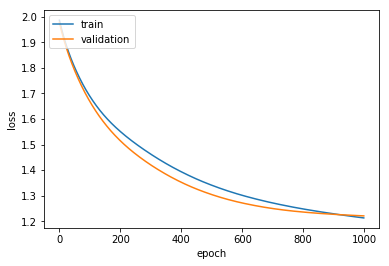

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

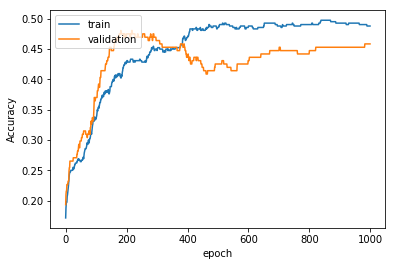

In [127]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()